# Task: Compare New York Pizza Restaurants with Above Average and Below Average Ratings
![Pizza gif](https://media.giphy.com/media/eK1eFdpj5kMWqZ9bLJ/giphy.gif?cid=ecf05e47rkbp48nwz3za6dloo8xfwzueu0rx2vklguo7xyhu&rid=giphy.gif&ct=g)

## Business Understanding 

A client at your analytics firm is considering opening a pizza restaurant in New York City. 

They have asked you to develop a business intelligence report to fact check the following claims:
1. Your client wants to ensure they have an above average Yelp rating. They have previously owned restuarants in other cities, where a `3` was the average. They would like to know if that holds true in New York City. 
1. Your client has noticed that restaurants on yelp with a high review count seem to be quite successful. They have decided to focus on maximizing their review count which they believe will allow them to have an above average overall review. 
1. After looking at a few restaurants on Yelp, your client believes that most above average restaurants have a price point of `$$`. They are considering increasing their prices from `$` to `$$` to match the majority of above average restaurants, and would like you to find the most common price point for above average restaurants in New York City.
1. In terms of location they have been told that above average restaurants are usually further east and below average are usually further west, but that the biggest difference is whether the restaurant is on the north or south side. They would like you to determine if the data supports this claim.
1. They believe that the `10012` zipcode in New York City is the best place to open a restaurant. They wish to open a restaurant in close proximity to other highly rated restaurants, and they believe `10012` has the most in NYC.

## Load the data

In [1]:
# Import the json python package
import json

# Load in the data
with open('pizza_businesses.json') as f:
    data = json.load(f)

## Describing the data

Now that we've loaded in the dataset, the structure of the data should be inspected.

In the cell below, we will evaluate 
- The datatype of the overall dataset
- The datatype of a single observation
- The number of observations, and then
- Isolate the first observation in the dataset

In [2]:
# Finding the datatype for the overall dataset
dataset_type = type(data)

# Isolating the first observation
first_observation = data[0]

# Finding the datatype for the first observation
observation_type = type(data[0])

# How many observations are there
num_observations = len(data)

In [3]:
from pprint import pprint

print(f'The dataset is a \033[1m{dataset_type}\033[0m')
print(f'The observations are a \033[1m{observation_type}\033[0m',)
print(f'There are \033[1m{num_observations} observations.\033[0m')
print('\033[1m\nThe first observation:\033[0m')
print('==========================================')
pprint(first_observation)
print('==========================================')

The dataset is a <class 'list'>
The observations are a <class 'dict'>
There are 1000 observations.

The first observation:
{'latitude': 40.72308755605564,
 'location': {'address1': '27 Prince St',
              'address2': None,
              'address3': '',
              'city': 'New York',
              'country': 'US',
              'display_address': ['27 Prince St', 'New York, NY 10012'],
              'state': 'NY',
              'zip_code': '10012'},
 'longitude': -73.99453001177575,
 'name': 'Prince Street Pizza',
 'phone': '+12129664100',
 'price': '\\$',
 'rating': 4.5,
 'review_count': 3976,
 'transactions': ['delivery', 'pickup']}


## Find the possible rating options. 

In the cell below, we will create a variable called `rating_options` that has a [set datatype](https://realpython.com/python-sets/), and is a unique collection of the possible ratings a restaurant can recieve.

In [4]:
# Create the `rating_options` variable
rating_options = []

for restaurant in data:
    rating_options.append(restaurant['rating'])
# Loop over all of the observations in the dataset
rating_options = set(rating_options)

rating_options

{1.0, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0}

In [5]:
#assertion tests to ensure that the code is right

assert type(rating_options) == set
assert len(rating_options) == 8
assert list(rating_options)[0] != list(rating_options)[1]

## Plot the distribution for ratings

Now that you know what rating options are available, in the cell below plot a histogram showing the distribution of ratings. 

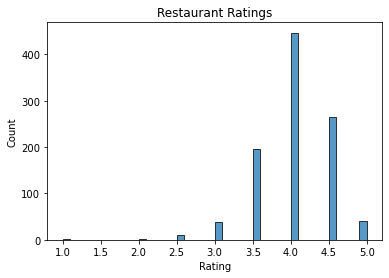

In [6]:
# Import matplotlib's pyplot module
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
ratings = []

# Loop over every restaurant in the dataset
for restaurant in data:

    # Isolate the rating
    ratings.append(restaurant['rating'])
    # Append the rating to the `ratings` list

sns.histplot(data = ratings,)
plt.title("Restaurant Ratings")
plt.xlabel("Rating");

**Interpret the ratings histogram**

The client wants to know if 3 as an average rating holds true in New York City. Based on the histogram above, 4.0 rating is the most frequent restaurant rating in New York.

## Isolate the restaurants with an above average rating

Now that you have an understanding for what is an average rating, next you will isolate restaurants with above average and below average ratings so you can compare them.

In the cell below, filter out all restaurants that do not have a rating of at least `4.5`.

In [7]:
# Creating an empty list to store restaurants in this list
above_average = []

# Loop over the dataset
for restaurant in data:
    # Isolate the rating
    # Check if the rating is at least 4.5
    if restaurant['rating'] >= 4.5:
        # If the rating is at least 4.5
        # Add the restaurant to the list
        above_average.append(restaurant)

In [8]:
#assertion tests to check our code

assert type(above_average) == list
assert type(above_average[0]) == dict
assert len(above_average) == 306

## Isolate restaurants with a below average rating

Now repeat the process for below average ratings.

In the cell below, isolate restaurants that have a rating of no more than `3.5`.

In [9]:
# Create an empty list
# You will store restaurants in this list
below_average = []

# Loop over the restaurants in the dataset
for restaurant in data:
    # Isolate the rating
    # Check if the rating is no more than 3.5
    if restaurant['rating'] <= 3.5:
        # If the rating no more than 3.5
        # Add the restaurant to the list
        below_average.append(restaurant)

In [10]:
#assertion tests to check our code

assert type(below_average) == list
assert type(below_average[0]) == dict
assert len(below_average) == 247

## Calculate average review counts for both groups

Now that we've isolated above average and below average restaurants, we can calculate the average number of reviews received by both groups.

To do this, we will need to isolate the review counts for both groups, and calculate their average. 

In the cell below, we will define a function called `isolate_values` that receives two arguments:
1. A list of dictionaries
2. A string indicating the key that should be isolated for each dictionary

This function should:
- Loop over every dictionary in the inputted list
- Pull out the value assigned to the inputted key
- Append the value to a new list
- Return the new list of values

In [11]:
def isolate_values(dictionaries, key):
    # Create an empty list for storing data
    list_of_values = []
    
    # Loop over every dicionary 
    for dictionary in dictionaries:
        list_of_values.append(dictionary[key])
        # Isolate the value of the dictionary with the `key`
        # Append the value to the list

    return list_of_values
    # Return the list of values

In [12]:
from types import FunctionType

assert type(isolate_values) == FunctionType
assert type(isolate_values([{'test': 1}], 'test')) == list
assert len(isolate_values([{'test': 1}], 'test')) == 1
assert len(isolate_values(above_average, 'name')) == len(above_average)
assert isolate_values(above_average, 'name')[-1] == above_average[-1]['name']

Now we are going to use the `isolate_values` function to create a list called `abv_avg_rev_cnts` that contains the review counts for every above average restaurant.

In [13]:
abv_avg_rev_cnts = isolate_values(above_average, 'review_count')

Then we use the `isolate_values` function to create a list called `blw_avg_rev_cnts` that contains the review counts for every below average restaurant.

In [14]:
blw_avg_rev_cnts = isolate_values(below_average, 'review_count')

In [15]:
assert type(abv_avg_rev_cnts) == list
assert type(abv_avg_rev_cnts[0]) == int
assert type(blw_avg_rev_cnts) == list
assert type(blw_avg_rev_cnts[0]) == int
assert len(abv_avg_rev_cnts) == len(above_average)
assert len(blw_avg_rev_cnts) == len(below_average)
assert abv_avg_rev_cnts[101] == above_average[101]['review_count']
assert blw_avg_rev_cnts[101] == below_average[101]['review_count']

Now that we have isolated the review counts for both groups, we can calculate the average review count.

We should first inspect the distribution of review counts to make sure `mean` is an appropriate measure of centrality.

In the cell below, we plot a histogram for above average and below average restaurant review counts.

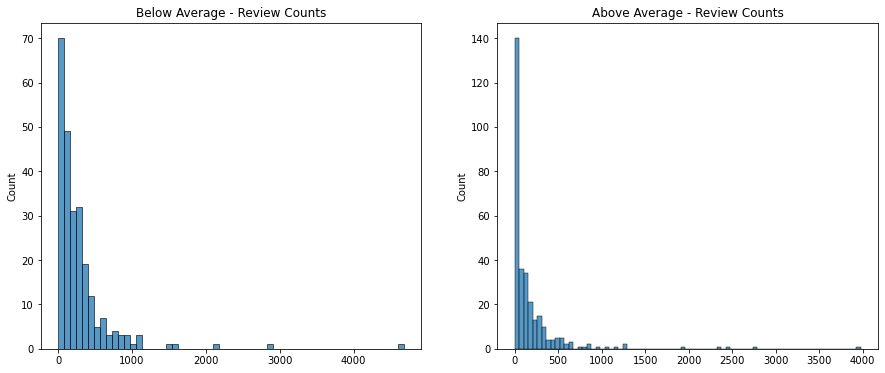

In [16]:
# Initialize a matplotlib subplot with 1 row and 2 columns
fig, ax = plt.subplots(1,2, figsize=(15,6))

# Plot a histogram of below average review counts on the first axis
#ax[0].hist(blw_avg_rev_cnts)
sns.histplot(data=blw_avg_rev_cnts, ax=ax[0])

# Set the title for the first axis to "Below Average - Review Counts"
ax[0].set_title("Below Average - Review Counts")

# Plot a histogram of above average review counts on the second axis
#ax[1].hist(abv_avg_rev_cnts)
sns.histplot(data=abv_avg_rev_cnts,ax=ax[1] )
# Set the title for the first axis to "Above Average - Review Counts"
ax[1].set_title("Above Average - Review Counts");

**Interpret the above visualizations. What statistic is best suited for these data?**

Based on the above data, mean is not an appropriate measure of centrality because of a few outliers. Median would be a more appropriate measure of central tendency.

In the cell below, calculate the average review count for above average and below average restaurants.

In [17]:
# Import numpy
import numpy as np
abv_avg_rev_cnt_center = np.median(abv_avg_rev_cnts)
blw_avg_rev_cnt_center = np.median(blw_avg_rev_cnts)

print('Above average review count:', abv_avg_rev_cnt_center)
print('Below average review count:', blw_avg_rev_cnt_center)

Above average review count: 65.5
Below average review count: 168.0


The client claims that restaurants with higher review counts are more successful. Based on the data, below average restaurants have higher review counts than their above average counterpart. The data doesn't support their claims that a higher review count will equal to a above average rating.

## Count the price option frequency

The `price` variable in the dataset is a string of dollar signs indicating how expensive a restaurant's price point is. 

In the cell below, write a for loop that counts how frequently a given price point appears for the `above_average` dataset

In [18]:
# Create an empty dictionary to store the counts for each price point
abv_avg_prices = {}

# Loop over the above average restaurants
for restaurant in above_average:
    if restaurant['price'] not in abv_avg_prices:
        abv_avg_prices[restaurant['price']] = 1
    else:
        abv_avg_prices[restaurant['price']] += 1
    
abv_avg_prices

{'\\$': 74, '\\$\\$': 87, 'Unknown': 134, '\\$\\$\\$': 10, '\\$\\$\\$\\$': 1}

In [19]:
assert type(abv_avg_prices) == dict
assert len(abv_avg_prices) == 5
assert '\\$\\$\\$\\$' in abv_avg_prices

**Now we will reapply the same process, but we will instead calculate the price point frequencies for the `below_average` dataset.**

In [20]:
# Create an empty dictionary to store the counts for each price point

blw_avg_prices = {}
# Loop over the below average restaurants
for restaurant in below_average:
    if restaurant['price'] not in blw_avg_prices:
        blw_avg_prices[restaurant['price']] = 1
    else:
        blw_avg_prices[restaurant['price']] += 1
    
blw_avg_prices

{'\\$\\$': 88, '\\$': 128, 'Unknown': 19, '\\$\\$\\$': 12}

In [21]:
assert type(blw_avg_prices) == dict
assert len(blw_avg_prices) == 4
assert '\\$' in blw_avg_prices

## Create a bar plot that sets the frequency of each price point as the y axis

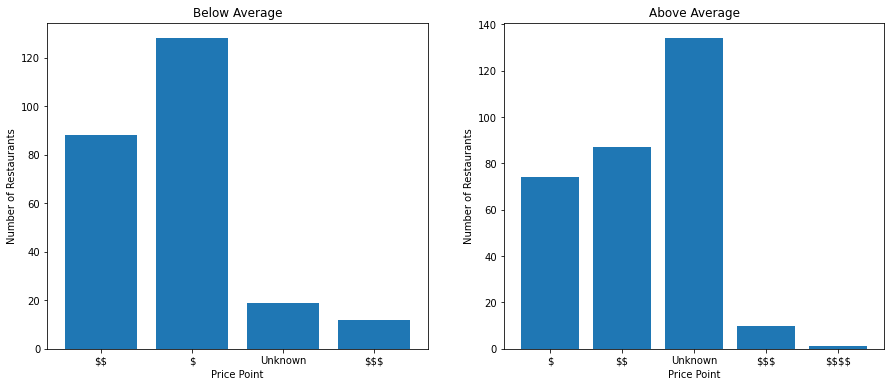

In [22]:
# Create a matplotlib subplot with 1 row and 2 columns
fig, ax = plt.subplots(1,2, figsize=(15,6))

# Isolate keys of the below average price count dictionary
# This will be the x-axis
blw_avg_x_axis = blw_avg_prices.keys()
ax[0].set_xlabel("Price Point")

# Isolate the values of the below average price count dictionary
# This will be the y-axis

blw_avg_y_axis = blw_avg_prices.values()
ax[0].set_ylabel("Number of Restaurants")


# Plot the below average price point counts as a bar plot on the first axis
ax[0].bar(blw_avg_x_axis, blw_avg_y_axis)

# Set the title for the first axis to the string "Below Average"
ax[0].set_title("Below Average")

# Isolate keys of the above average price count dictionary. This will be the x-axis
abv_avg_x_axis = abv_avg_prices.keys()
ax[1].set_xlabel("Price Point")

# Isolate the values of the above average price count dictionary This will be the y-axis
abv_avg_y_axis = abv_avg_prices.values()
ax[1].set_ylabel("Number of Restaurants")

# Plot the above average price counts as a bar plot on the second axis
ax[1].bar(abv_avg_x_axis, abv_avg_y_axis)

# Set the title for the second axis to  the string 'Above Average'
ax[1].set_title("Above Average");


**Interpretation**

The client believes that most above average restaurants have a price point of $$. According to the data, most above average restaurants have an unknown price point.

## Analyzing restaurant location

In the cell below, we will use the `isolate_values` function to isolate `longitude` and `latitude` for above and below average restaurants.

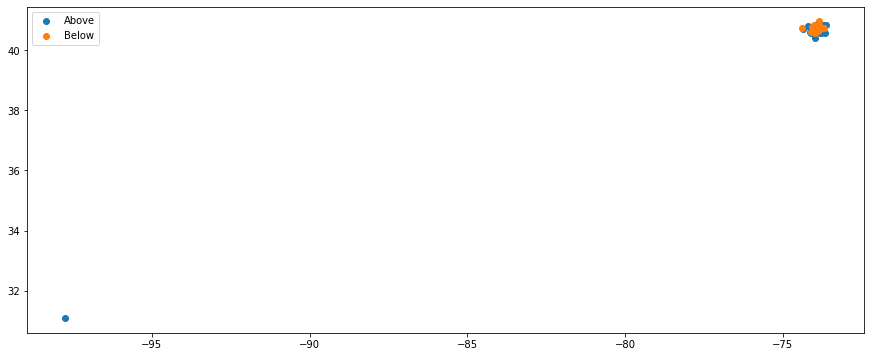

In [23]:
# Isolate longitude for above average restaurants
abv_avg_lon = isolate_values(above_average, 'longitude')

# Isolate latitude for above average restaurants
abv_avg_lat = isolate_values(above_average, 'latitude')

# Isolate longitude for below average restaurants
blw_avg_lon = isolate_values(below_average, 'longitude')

# Isolate latitude for below average restaurants
blw_avg_lat = isolate_values(below_average, 'latitude')

plt.figure(figsize=(15,6))
plt.scatter(abv_avg_lon, abv_avg_lat, label='Above')
plt.scatter(blw_avg_lon, blw_avg_lat, label='Below')
plt.legend();

## Removing the outlier

There is one restaurant in the above average dataset with a location dramatically west and south of all other observations. Let's remove that restaurant from the above average dataset and regenerate the scatter plot.

In [24]:
no_outliers = []

# Create an empty list to append the outlier
outlier = []

# Loop over every restaurant in the above average dataset
for restaurant in above_average:
    
    # Isolate the restaurant's longitude
    if restaurant['longitude'] > -90:
    # Check if the longitude value is greater than the integer -90
        no_outliers.append(restaurant)
        # Append the restaurant to the no_outliers list

    else:
        outlier.append(restaurant)
    # If longitude is less than -90 it is an outlier and should be appended to the outlier list

In [25]:
assert type(no_outliers) == list
assert type(outlier) == list
assert len(no_outliers) == len(above_average) - 1
assert len(outlier) == 1

Now we will regenerate the longitude and latitude for above average restaurants using the `no_outliers` dataset, and regenerate the scatter plot!

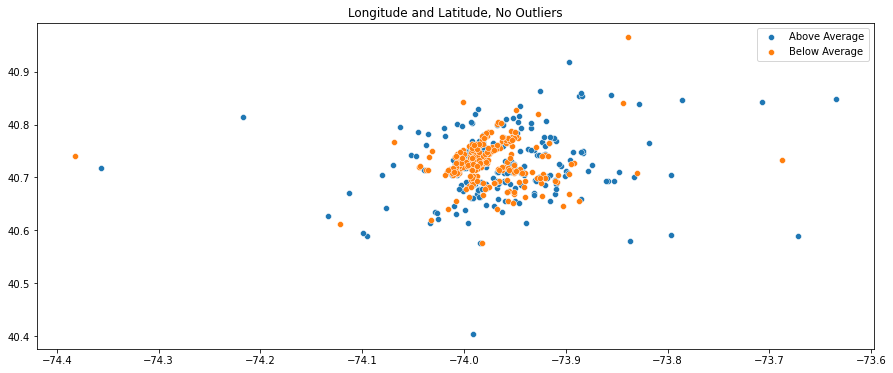

In [35]:
abv_avg_lon = isolate_values(no_outliers, 'longitude')
abv_avg_lat = isolate_values(no_outliers, 'latitude')

plt.figure(figsize=(15,6))
sns.scatterplot(x=abv_avg_lon, y=abv_avg_lat, label="Above Average")
sns.scatterplot(x=blw_avg_lon, y=blw_avg_lat, label="Below Average")
plt.title("Longitude and Latitude, No Outliers");

## Plot the distribution of latitude and longitude


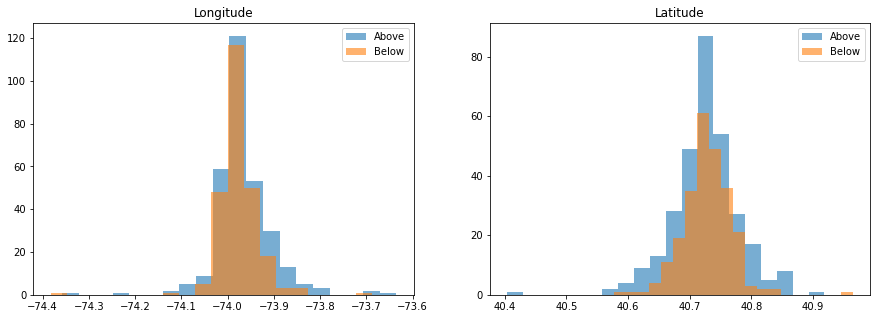

In [39]:
# Create a matplotlib subplot with 1 row and 2 columns
fig, (ax1,ax2) = plt.subplots(figsize=(15,5), ncols=2)

# Plot a histogram of above average longitude
# on the first subplot axis. Set alpha to .6
# Set label to the string "Above"
ax1.hist(abv_avg_lon, alpha=0.6, label="Above",bins=20)

# Plot a histogram of below average longitude
# on the first subplot axis. Set alpha to .6
# Set label to the string "Below"
ax1.hist(blw_avg_lon, alpha=0.6, label="Below", bins=20)

# Set the title for the first subplot axis
# to the string "Longitude"
ax1.set_title("Longitude")
ax1.legend()


# Plot a histogram of above average latitude
# on the second subplot axis. Set alpha to .6
# Set label to the string "Above"
ax2.hist(abv_avg_lat, alpha=0.6, label="Above", bins=20)


# Plot a histogram of below average latitude
# on the second subplot axis. Set alpha to .6
# Set label to the string "Below"
ax2.hist(blw_avg_lat, alpha=0.6, label="Below", bins=20)


# Set the title for the second subplot axis
# to the string "Latitude"
ax2.set_title("Latitude")
ax2.legend();


**Interpret the above visualization. How does it relate to your client's claims?**

The client has been told that above average restaurants are usually further east and below average are usually further west, but that the biggest difference is whether the restaurant is on the north or south side. Based on our data, there is a similar amount of above and below average restaurants in the West. However there is more above average restaurants in the North than below average restaurants.

## Find the most common zipcode for above average restaurants

In the cell below, loop over the restaurants in the above average dataset and count the frequency of the restaurants zipcode.

In [40]:
abv_avg_zip_cnts = {}
# Loop over the above average dataset

for restaurant in above_average:
    # Isolate the restaurant's zipcode 
    # Check if the zipcode is a key in the dictionary
    if restaurant['location']['zip_code'] not in abv_avg_zip_cnts:
        # Add one to the zipcode's value
        abv_avg_zip_cnts[restaurant['location']['zip_code']] = 1
        
    # If the zipcode is not a key
    # add it to the dictionary with a value of 1
    else:
        abv_avg_zip_cnts[restaurant['location']['zip_code']] += 1

In [41]:
assert type(abv_avg_zip_cnts) == dict
assert len(abv_avg_zip_cnts) == 104 or len(abv_avg_zip_cnts) == 103
assert '10012' in abv_avg_zip_cnts

Now we are going to loop over the `abv_avg_zip_cnts` dictionary and find the zipcode with the largest count. 

In [42]:
most_frequent_zip = max(abv_avg_zip_cnts, key=abv_avg_zip_cnts.get)
print(most_frequent_zip)

10014


**Interpretation of the results**

The client believes that the 10012 zipcode in New York City is the best place to open a restaurant. Based on our findings, the most common above average zip code is 10014.

## Final Analysis

1. The client wants to know if 3 as an average rating holds true in New York City. Based on the histogram above, 4.0 rating is the most frequent restaurant rating in New York.

2. The client claims that restaurants with higher review counts are more successful. Based on the data, below average restaurants have higher review counts than their above average counterpart. The data doesn't support their claims that a higher review count will equal to a above average rating.

3. The client believes that most above average restaurants have a price point of $$. According to the data, most above average restaurants have an unknown price point.

4. The client has been told that above average restaurants are usually further east and below average are usually further west, but that the biggest difference is whether the restaurant is on the north or south side. Based on our data, there is a similar amount of above and below average restaurants in the West. However there is more above average restaurants in the North than below average restaurants.

5. The client believes that the 10012 zipcode in New York City is the best place to open a restaurant. Based on our findings, the most common above average zip code is 10014.
